**Importando bibliotecas necessárias**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


**Carregar csvs**

In [3]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas

comercializacao = pd.read_csv('Comercializacao.csv', sep = ';')
exportacao = pd.read_csv('Exportacao.csv', sep = ';')
importacao = pd.read_csv('Importacao.csv', sep = ';')
processamento = pd.read_csv('Processamento.csv', sep = ';')

# Visualizar primeiras linhas do dataset 'comercializacao'
comercializacao.head()


,id,control,Produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,122825298,128894580,166861772,195616620,171619507,185191837,203130018,131065191,150678647,172921267,164725646,190134895,180230431,201168480,180295366,146583828,165831436,174768638,181576649,200578746,221023603,221518224,227447392,217082959,225021830,271248493,245625614,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,99646124,99151812,131957890,151852639,129249097,138710394,153357217,96590206,114100716,136642954,120889721,141726264,138190489,157031022,140192480,108968350,122549540,127693158,133479291,150857434,172183792,176793696,181274195,179225328,186236086,227987458,209438207,190526781,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,14746625,16360547,15786964,23841328,21724540,23988088,28544630,21376304,17329181,14564451,16482188,16322381,12822511,13767249,13762956,11653971,13374874,13550872,12980172,13221934,9150927,7283912,8434812,6945806,5478618,3562059,3071382,2252558,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,8432549,13382221,19116918,19922653,20645870,22493355,21228171,13098681,19248750,21713862,27353737,32086250,29217431,30370209,26339930,25961507,29907022,33524608,35117186,36499378,39688884,37440616,37738385,30911825,33307126,39698976,33116025,29122090,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,22976342,21607857,26302928,32690119,42164393,44599207,50881779,34335860,40014386,50390262,39885259,37526111,39537060,49916112,46541918,40195501,43695771,46442209,32456318,37096571,34195829,28701658,25438750,23293171,19884366,22306004,22767358,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [20]:
# Padronizar nomes na coluna Produto
comercializacao['Produto'] = (
    comercializacao['Produto']
    .str.strip()  # remove espaços no início e fim
    .str.replace(r'\s+', ' ', regex=True)  # substitui múltiplos espaços por um só
    .str.upper()  # coloca tudo em maiúsculas
)

In [21]:
# Alterar o formato da tabela para long, adicionando Ano como coluna
comercializacao_long = comercializacao.melt(
    id_vars=['id', 'control', 'Produto'],
    var_name='Ano',
    value_name='Comercializacao'
)
comercializacao_long.head(2)

,id,control,Produto,Ano,Comercializacao
0,1,VINHO DE MESA,VINHO DE MESA,1970,98327606
1,2,vm_Tinto,TINTO,1970,83300735


In [22]:
# Total de litros comercializados por Produto
top10_produtos = (
    comercializacao_long
    .groupby('Produto')['Comercializacao']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
# Filtrar apenas os Top 10
top10_long = comercializacao_long[comercializacao_long['Produto'].isin(top10_produtos)]

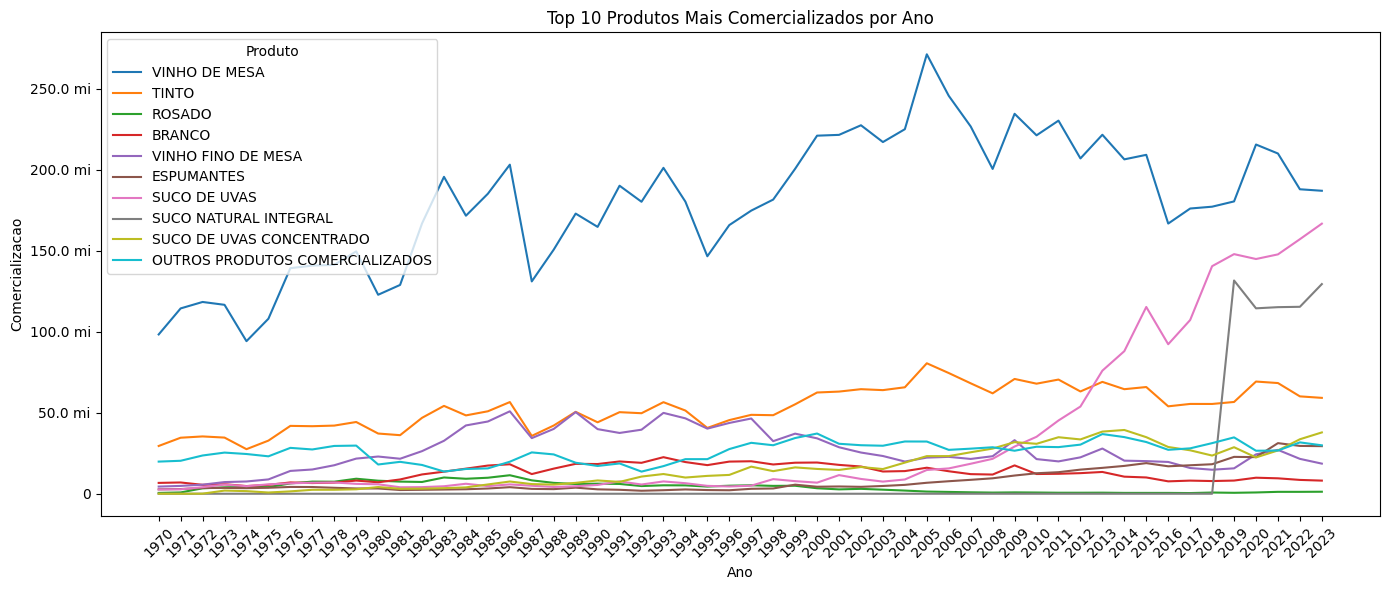

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Função para formatar os valores do eixo Y
def formatar_valores(valor, _):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} mi'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} mil'
    else:
        return f'{valor:.0f}'

# Criar o gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(data=top10_long, x='Ano', y='Comercializacao', hue='Produto', errorbar = None)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('Top 10 Produtos Mais Comercializados por Ano')
plt.tight_layout()
plt.show()

In [48]:

# Visualizar primeiras linhas do dataset 'exportacao'

# Padronizar registros contidos na colua País do df exportacao
exportacao['País'] = (
    exportacao['País']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.upper()
)

exportacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,AFEGANISTÃO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,46,0,0,0,0
1,2,ÁFRICA DO SUL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,463,1673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,95,4,21,0,0,0,0,117,698
2,3,"ALEMANHA, REPÚBLICA DEMOCRÁTICA",0,0,0,0,4168,2630,12000,8250,0,0,0,0,0,0,0,0,0,0,5400,6500,0,0,0,0,0,0,0,0,0,0,67,136,1037,1750,2700,4044,2205,3921,197,510,0,0,3780,7182,2700,5143,0,0,0,0,20700,40590,0,0,43,307,504,700,0,0,9900,15620,1673,11157,1080,4626,0,0,13589,28140,57393,106702,38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,10680,44780,14012,68109,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,ANGOLA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3465756,2387643,1682244,1118023,0,0,0,0,0,0,0,0,339,1082,774,1718,1316,3847,18500,12950,168,134,930,1090,125,116,292,332,189,238,0,0,24,46,2118,6401,68494,146017,15780,34732,10998,16738,249717,368817,12150,15529,9812,5290,19937,11437,37573,50382,24056,33039,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,1908,17089,7359,35390,10170,61680,477,709,345,1065,0,0,0,0,4068,4761,0,0
4,5,ANGUILLA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,80,324,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:

# Padronizar nomes das colunas

import re  # Importa o módulo de expressões regulares

# Seleciona colunas que representam apenas o ano (ex: '1970', '1985', '2023')
colunas_volume = [
    col for col in exportacao.columns
    if re.match(r'^\d{4}$', str(col))  # Regex: começa e termina com exatamente 4 dígitos
]

# Seleciona colunas que representam o valor monetário (ex: '1970.1', '1985.1', '2023.1')
colunas_valor = [
    col for col in exportacao.columns
    if re.match(r'^\d{4}\.1$', str(col))  # Regex: 4 dígitos seguidos de ponto e 1
]

# Transformar df para formato long (tidy)
exportacao_volume_long = exportacao.melt(
    id_vars=['Id', 'País'],
    value_vars=colunas_volume,
    var_name='Ano',
    value_name='Volume'
)

exportacao_valor_long = exportacao.melt(
    id_vars=['Id', 'País'],
    value_vars=colunas_valor,
    var_name='Ano',
    value_name='Valor'
)

# Ajustar o nome do ano (remover ".1")
exportacao_valor_long['Ano'] = exportacao_valor_long['Ano'].str.replace('.1', '', regex=False)

# Unir longs
exportacao_long = pd.merge(
    exportacao_volume_long,
    exportacao_valor_long,
    on=['Id', 'País', 'Ano'],
    how='outer'
)

exportacao_long.head()





,Id,País,Ano,Volume,Valor
0,1,AFEGANISTÃO,1970,0,0
1,1,AFEGANISTÃO,1971,0,0
2,1,AFEGANISTÃO,1972,0,0
3,1,AFEGANISTÃO,1973,0,0
4,1,AFEGANISTÃO,1974,0,0


In [54]:
# Calcular top 10 países volume total
top10_paises_exp_vol = (
    exportacao_long
    .groupby('País')['Volume']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top10_paises_exp_vol = exportacao_long[exportacao_long['País'].isin(top10_paises_exp_vol)]

# Calcular top 10 países valor total
top10_paises_exp_valor = (
    exportacao_long
    .groupby('País')['Valor']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top10_paises_exp_valor = exportacao_long[exportacao_long['País'].isin(top10_paises_exp_valor)]

/tmp/ipython-input-1532329818.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=top10_exportacao, x='Ano', y='Volume', hue='País', ci=None)


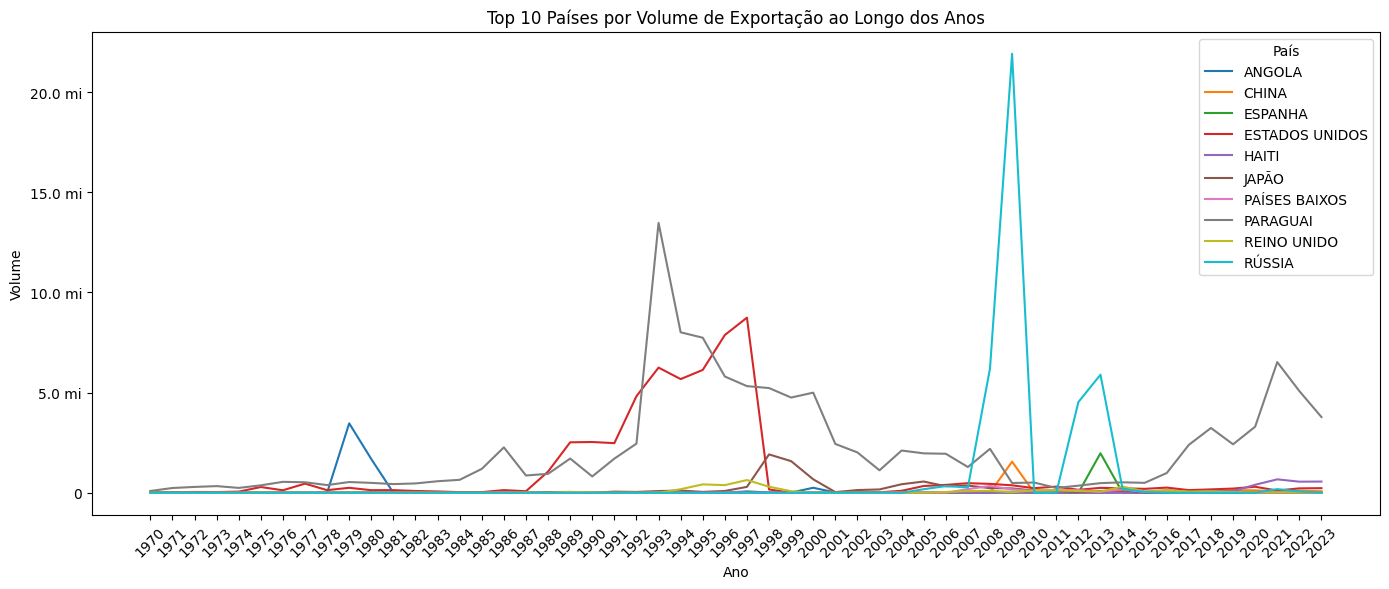

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def formatar_valores(valor, _):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} mi'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} mil'
    else:
        return f'{valor:.0f}'

plt.figure(figsize=(14, 6))
sns.lineplot(data=top10_exportacao, x='Ano', y='Volume', hue='País', ci=None)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('Top 10 Países por Volume de Exportação ao Longo dos Anos')
plt.tight_layout()
plt.show()

In [ ]:
# Visualizar primeiras linhas do dataset 'importacao'
importacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42661,99201,32194,106317,157239,305701,303489,665101,407413,775421,358870,1164032,386425,1320244,315380,1151699,493093,1931449,966276,3600658,507509,2136394,722327,3041449,475331,1985184,722715,3033932,743335,2996543,578829,1686226,1138732,3241298,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116,2266827,522733,1732850
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,219173,202502,134354,149931,168134,171308,160926,201840,437831,668631,433478,691404,457033,704307,707194,853830,996948,1126928,850055,908380,586645,564129,1069717,1122438,2357113,3008737,1307519,1863924,2029271,2757417,2885143,4074739,3342223,5875679,3096425,4545305,2515557,3644055,5721360,7155615,11047710,16068528,11919346,19758144,8680860,10629243,4867017,5108215,3014081,4834030,2576557,4539354,1164724,1668539,909077,1169872,759712,829695,573198,629664,420075,550750,253685,382599,314749,634870,234006,647626,293935,1063825,56075,291876,192661,784674,198025,933545,113243,591167,114866,414070,115804,483316,95171,358275,158386,606333,83289,315959,142971,516975,101055,412794,136992,504168,106541,546967,92600,438595,102456,557947
2,3,Argélia,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,563,3249,0,0,0,0,2510,8761,0,0,8,161
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,215930,167473,145823,90855,348653,277507,408399,395615,614134,709813,646978,888941,298471,479464,131738,209173,191972,264487,132634,188625,42438,64603,114570,164424,170413,242678,98854,136841,414931,590758,716062,1153585,455774,721398,852441,1493649,444896,815668,359542,795068,446315,730091,1397904,1992083,779008,1438076,1013306,2089559,1295190,3073775,2475780,5284871,2724941,6556544,2585537,6196286,3867336,6894469,5720024,9653634,10202602,17142493,10845213,21623751,11939727,25822840,15621172,36160548,14417761,37382581,13902750,38521731,16965266,52126581,16673491,58806736,14613839,55633562,12732815,49524694,13437321,53815956,12465041,48043201,14098009,45214862,15461740,51770842,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138


In [ ]:

# Visualizar primeiras linhas do dataset 'processamento'
processamento.head()

,id,control,cultivar,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,TINTAS,TINTAS,10448228,11012833,10798824,8213674,17457849,22593885,20265190,24830345,21984546,25805939,17369967,27976307,31912172,22168465,22290855,30195343,18736158,17213860,25753888,24032041,24795507,18045593,22146466,21189308,24444665,19451024,19313252,19980696,13590968,18051102,23975805,17853113,19059959,22281079,35135485,41398115,34162995,43653087,48852574,39148123,23633831,44473588,39303313,36855419,29810706,29935627,13370866,32850915,26868514,nd,28003505,93296587,*,"35881118,23"
1,2,ti_Alicante Bouschet,Alicante Bouschet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3226,6807,6677,16210,8203,46923,46983,0,0,54266,6525,66194,65322,67471,64396,102174,160318,160966,216461,320853,626500,1076865,1078887,1775837,1588326,1652912,849263,2130579,2098824,1524728,1456305,1519576,908841,2040198,2103844,nd,2272985,811140,*,"4108858,21"
2,3,ti_Ancelota,Ancelota,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26088,47013,64318,218623,604797,861431,872741,1532209,1709883,1370728,853718,1346552,1274677,1137943,937844,773526,179028,733907,492106,nd,481402,6513974,*,"783688,39"
3,4,ti_Aramon,Aramon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nd,0,0,*,0
4,5,ti_Alfrocheiro,Alfrocheiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13986,19473,43396,20509,25310,31168,0,4320,0,0,0,0,0,0,0,nd,0,0,*,0


**Análise Exploratória Inicial e Limpeza de Dados**



In [ ]:
# Dimensões, tipos das variáveis e quantidades de nulos dos datasets
print(comercializacao.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       62 non-null     int64 
 1   control  61 non-null     object
 2   Produto  62 non-null     object
 3   1970     62 non-null     int64 
 4   1971     62 non-null     int64 
 5   1972     62 non-null     int64 
 6   1973     62 non-null     int64 
 7   1974     62 non-null     int64 
 8   1975     62 non-null     int64 
 9   1976     62 non-null     int64 
 10  1977     62 non-null     int64 
 11  1978     62 non-null     int64 
 12  1979     62 non-null     int64 
 13  1980     62 non-null     int64 
 14  1981     62 non-null     int64 
 15  1982     62 non-null     int64 
 16  1983     62 non-null     int64 
 17  1984     62 non-null     int64 
 18  1985     62 non-null     int64 
 19  1986     62 non-null     int64 
 20  1987     62 non-null     int64 
 21  1988     62 non-null     int64 
 22  1989

In [ ]:
# Dimensões, tipos das variáveis e quantidades de nulos dos datasets
exportacao.info()
print(exportacao.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 110 entries, Id to 2023.1
dtypes: int64(109), object(1)
memory usage: 117.9+ KB
Id         int64
País      object
1970       int64
1970.1     int64
1971       int64
           ...  
2021.1     int64
2022       int64
2022.1     int64
2023       int64
2023.1     int64
Length: 110, dtype: object


In [ ]:
# Dimensões, tipos das variáveis e quantidades de nulos dos datasets
importacao.info()
print(importacao.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Columns: 110 entries, Id to 2023.1
dtypes: float64(1), int64(108), object(1)
memory usage: 58.6+ KB
Id          int64
País       object
1970        int64
1970.1    float64
1971        int64
           ...   
2021.1      int64
2022        int64
2022.1      int64
2023        int64
2023.1      int64
Length: 110, dtype: object


In [ ]:
# Dimensões, tipos das variáveis e quantidades de nulos dos datasets
print(processamento.info())
print(processamento.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        139 non-null    int64 
 1   control   139 non-null    object
 2   cultivar  139 non-null    object
 3   1970      139 non-null    int64 
 4   1971      139 non-null    int64 
 5   1972      139 non-null    int64 
 6   1973      139 non-null    int64 
 7   1974      139 non-null    int64 
 8   1975      139 non-null    int64 
 9   1976      139 non-null    int64 
 10  1977      139 non-null    int64 
 11  1978      139 non-null    int64 
 12  1979      139 non-null    int64 
 13  1980      139 non-null    int64 
 14  1981      139 non-null    int64 
 15  1982      139 non-null    int64 
 16  1983      139 non-null    int64 
 17  1984      139 non-null    int64 
 18  1985      139 non-null    int64 
 19  1986      139 non-null    int64 
 20  1987      139 non-null    int64 
 21  1988      139 no

In [60]:
#pd.reset_option('display.max_rows')
comercializacao_long['Produto'].describe()

,Produto
count,3348
unique,56
top,TINTO
freq,162


In [ ]:
processamento.isna().sum()

,0
id,0
control,0
cultivar,0
1970,0
1971,0
1972,0
1973,0
1974,0
1975,0
1976,0


In [ ]:
# Seleciona linhas que possuem pelo menos um valor ausente (NaN).


processamento[processamento.isna().any(axis=1)].assign(qtd_na = processamento.isna().sum(axis=1))

,id,control,cultivar,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,qtd_na
32,33,ti_Jaen,Jaen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,576,2824,4290,215,1037,3642,0,0,0,0,0,0,0,0,0,nd,0,0,*,NaN,1
84,85,br_Clairette(1),Clairette(1),146617,116887,120166,94006,116154,139266,144596,87281,86242,86382,29871,52133,67028,5834,11168,13929,12182,910,0,0,754,0,0,0,5228,0,153092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,949,0,0,0,0,0,0,0,nd,0,0,*,NaN,1


In [ ]:
processamento.describe()

,id,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021
count,139.000000,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02
mean,70.000000,4.216801e+05,4.774255e+05,4.154287e+05,2.939219e+05,6.199097e+05,7.475624e+05,7.204421e+05,8.274129e+05,7.560052e+05,8.949123e+05,6.579030e+05,9.704942e+05,1.131931e+06,7.799878e+05,9.195097e+05,1.385595e+06,9.536462e+05,9.526901e+05,1.486791e+06,1.441916e+06,1.415140e+06,9.290952e+05,1.089328e+06,1.069011e+06,1.112711e+06,9.514665e+05,8.949691e+05,9.223029e+05,6.576430e+05,8.422726e+05,1.058842e+06,7.116834e+05,6.860993e+05,6.230135e+05,8.989343e+05,1.013880e+06,8.129341e+05,1.034637e+06,1.200792e+06,1.031727e+06,6.581000e+05,1.185678e+06,1.090979e+06,1.062068e+06,9.435951e+05,1.008147e+06,4.624494e+05,1.106606e+06,9.437506e+05,9.929168e+05,2.367810e+06
std,40.269923,2.032006e+06,2.408042e+06,2.038885e+06,1.398093e+06,2.983121e+06,3.525315e+06,3.427802e+06,3.891647e+06,3.553012e+06,4.225291e+06,3.143219e+06,4.569962e+06,5.339594e+06,3.648229e+06,4.425738e+06,6.747072e+06,4.720228e+06,4.785396e+06,7.513596e+06,7.309744e+06,7.048617e+06,4.487776e+06,5.293298e+06,5.123253e+06,5.214458e+06,4.552506e+06,4.252607e+06,4.367090e+06,3.128656e+06,4.158189e+06,5.036035e+06,3.300927e+06,3.193189e+06,2.819222e+06,4.091784e+06,4.571918e+06,3.753835e+06,4.812517e+06,5.467290e+06,4.649202e+06,2.927638e+06,5.335190e+06,4.836658e+06,4.709738e+06,4.198300e+06,4.486448e+06,2.070321e+06,4.921597e+06,4.192152e+06,4.411265e+06,1.030022e+07
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,35.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,70.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0